In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder as LE
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

## Data Segregation

In [2]:
df = pd.read_csv('final.csv')
df = df[df['ARR_DEL15']==1]
df.keys()

Index(['Unnamed: 0', 'QUARTER', 'MONTH', 'DAY_OF_MONTH', 'ORIGIN', 'DEST',
       'CRS_DEP_TIME', 'DEP_DELAY', 'DEP_DEL15', 'CRS_ARR_TIME', 'ARR_DELAY',
       'ARR_DEL15', 'windspeedKmph', 'winddirDegree', 'weatherCode',
       'precipMM', 'visibility', 'pressure', 'cloudcover', 'DewPointF',
       'WindGustKmph', 'tempF', 'WindChillF', 'humidity'],
      dtype='object')

In [3]:
del df['Unnamed: 0']

df = df.drop(['ARR_DEL15'],1)

X = np.array((df.drop(['ARR_DELAY'],1)))
y = np.array((df['ARR_DELAY']))

## Linear Regression

In [4]:
x_train, x_test, y_train, y_test = train_test_split( X, y, test_size=0.20, random_state=42)

regression_model = LinearRegression()
regression_model.fit(x_train , y_train)
pred = regression_model.predict(x_test)

mse = mean_squared_error(y_test , pred)
r2 = r2_score(y_test , pred)
mae = mean_absolute_error(y_test, pred)

print('Mean Absolute Error     : ', mae)
print('Root mean squared error : ', np.sqrt(mse))
print('R2 score                : ', r2)


Mean Absolute Error     :  12.347468263071331
Root mean squared error :  17.7751887287728
R2 score                :  0.9400751242722952


## Decision Tree Regressor

In [13]:
from sklearn.tree import DecisionTreeRegressor

x_train, x_test, y_train, y_test = train_test_split( X, y, test_size=0.20, random_state=42)

regression_model = DecisionTreeRegressor()
regression_model.fit(x_train , y_train)
pred = regression_model.predict(x_test)

mse = mean_squared_error(y_test , pred)
r2 = r2_score(y_test , pred)
mae = mean_absolute_error(y_test, pred)

print('Mean Absolute Error     : ', mae)
print('Root mean squared error : ', np.sqrt(mse))
print('R2 score                : ', r2)


Mean Absolute Error     :  16.5984643480811
Root mean squared error :  24.138122950317243
R2 score                :  0.8894940427136067


In [14]:
importances = regression_model.feature_importances_
indices = np.argsort(importances)[::-1]

print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

Feature ranking:
1. feature 6 (0.944668)
2. feature 8 (0.005977)
3. feature 5 (0.005261)
4. feature 10 (0.004681)
5. feature 20 (0.003565)
6. feature 2 (0.003549)
7. feature 3 (0.003257)
8. feature 14 (0.003227)
9. feature 16 (0.003226)
10. feature 17 (0.003081)
11. feature 9 (0.002871)
12. feature 15 (0.002697)
13. feature 18 (0.002451)
14. feature 12 (0.002433)
15. feature 19 (0.002384)
16. feature 4 (0.002008)
17. feature 11 (0.001622)
18. feature 1 (0.001603)
19. feature 13 (0.000921)
20. feature 0 (0.000437)
21. feature 7 (0.000080)


## XGBoost

In [4]:
x_train, x_test, y_train, y_test = train_test_split( X, y, test_size=0.20, random_state=42)

clf = GradientBoostingRegressor(n_estimators=150)
clf.fit(x_train, y_train)
pred = clf.predict(x_test)

mse = mean_squared_error(y_test, pred)
r2 = r2_score(y_test , pred)
mae = mean_absolute_error(y_test, pred)

print('Mean Absolute Error     : ', mae)
print('Root mean squared error : ', np.sqrt(mse))
print('R2 score                : ', r2)

Mean Absolute Error     :  11.633092693776304
Root mean squared error :  16.888926166197656
R2 score                :  0.945901804987648


### Feature Importance

In [5]:
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]

print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

Feature ranking:
1. feature 6 (0.996005)
2. feature 12 (0.001133)
3. feature 8 (0.000678)
4. feature 4 (0.000463)
5. feature 16 (0.000321)
6. feature 9 (0.000272)
7. feature 11 (0.000264)
8. feature 3 (0.000164)
9. feature 5 (0.000147)
10. feature 18 (0.000107)
11. feature 14 (0.000096)
12. feature 17 (0.000079)
13. feature 1 (0.000062)
14. feature 2 (0.000055)
15. feature 20 (0.000046)
16. feature 10 (0.000037)
17. feature 19 (0.000028)
18. feature 0 (0.000019)
19. feature 15 (0.000016)
20. feature 13 (0.000009)
21. feature 7 (0.000000)


## Extra Trees

In [9]:
x_train, x_test, y_train, y_test = train_test_split( X, y, test_size=0.20, random_state=42)

etr = ExtraTreesRegressor(n_estimators=150)
etr.fit(x_train,y_train)
pred = etr.predict(x_test)

mse = mean_squared_error(y_test, pred)
r2 = r2_score(y_test , pred)
mae = mean_absolute_error(y_test, pred)

print('Mean Absolute Error     : ', mae)
print('Root mean squared error : ', np.sqrt(mse))
print('R2 score                : ', r2)

Mean Absolute Error     :  11.853778210272337
Root mean squared error :  16.925935494735626
R2 score                :  0.9456644504593396


### Feature Importance

In [10]:
importances = etr.feature_importances_
indices = np.argsort(importances)[::-1]

print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

Feature ranking:
1. feature 6 (0.894282)
2. feature 7 (0.050055)
3. feature 8 (0.003928)
4. feature 3 (0.003920)
5. feature 5 (0.003839)
6. feature 2 (0.003252)
7. feature 10 (0.003243)
8. feature 9 (0.003177)
9. feature 17 (0.003156)
10. feature 14 (0.003130)
11. feature 20 (0.003099)
12. feature 11 (0.003014)
13. feature 16 (0.003001)
14. feature 15 (0.002878)
15. feature 4 (0.002826)
16. feature 18 (0.002683)
17. feature 19 (0.002607)
18. feature 12 (0.002480)
19. feature 1 (0.002274)
20. feature 13 (0.001603)
21. feature 0 (0.001555)


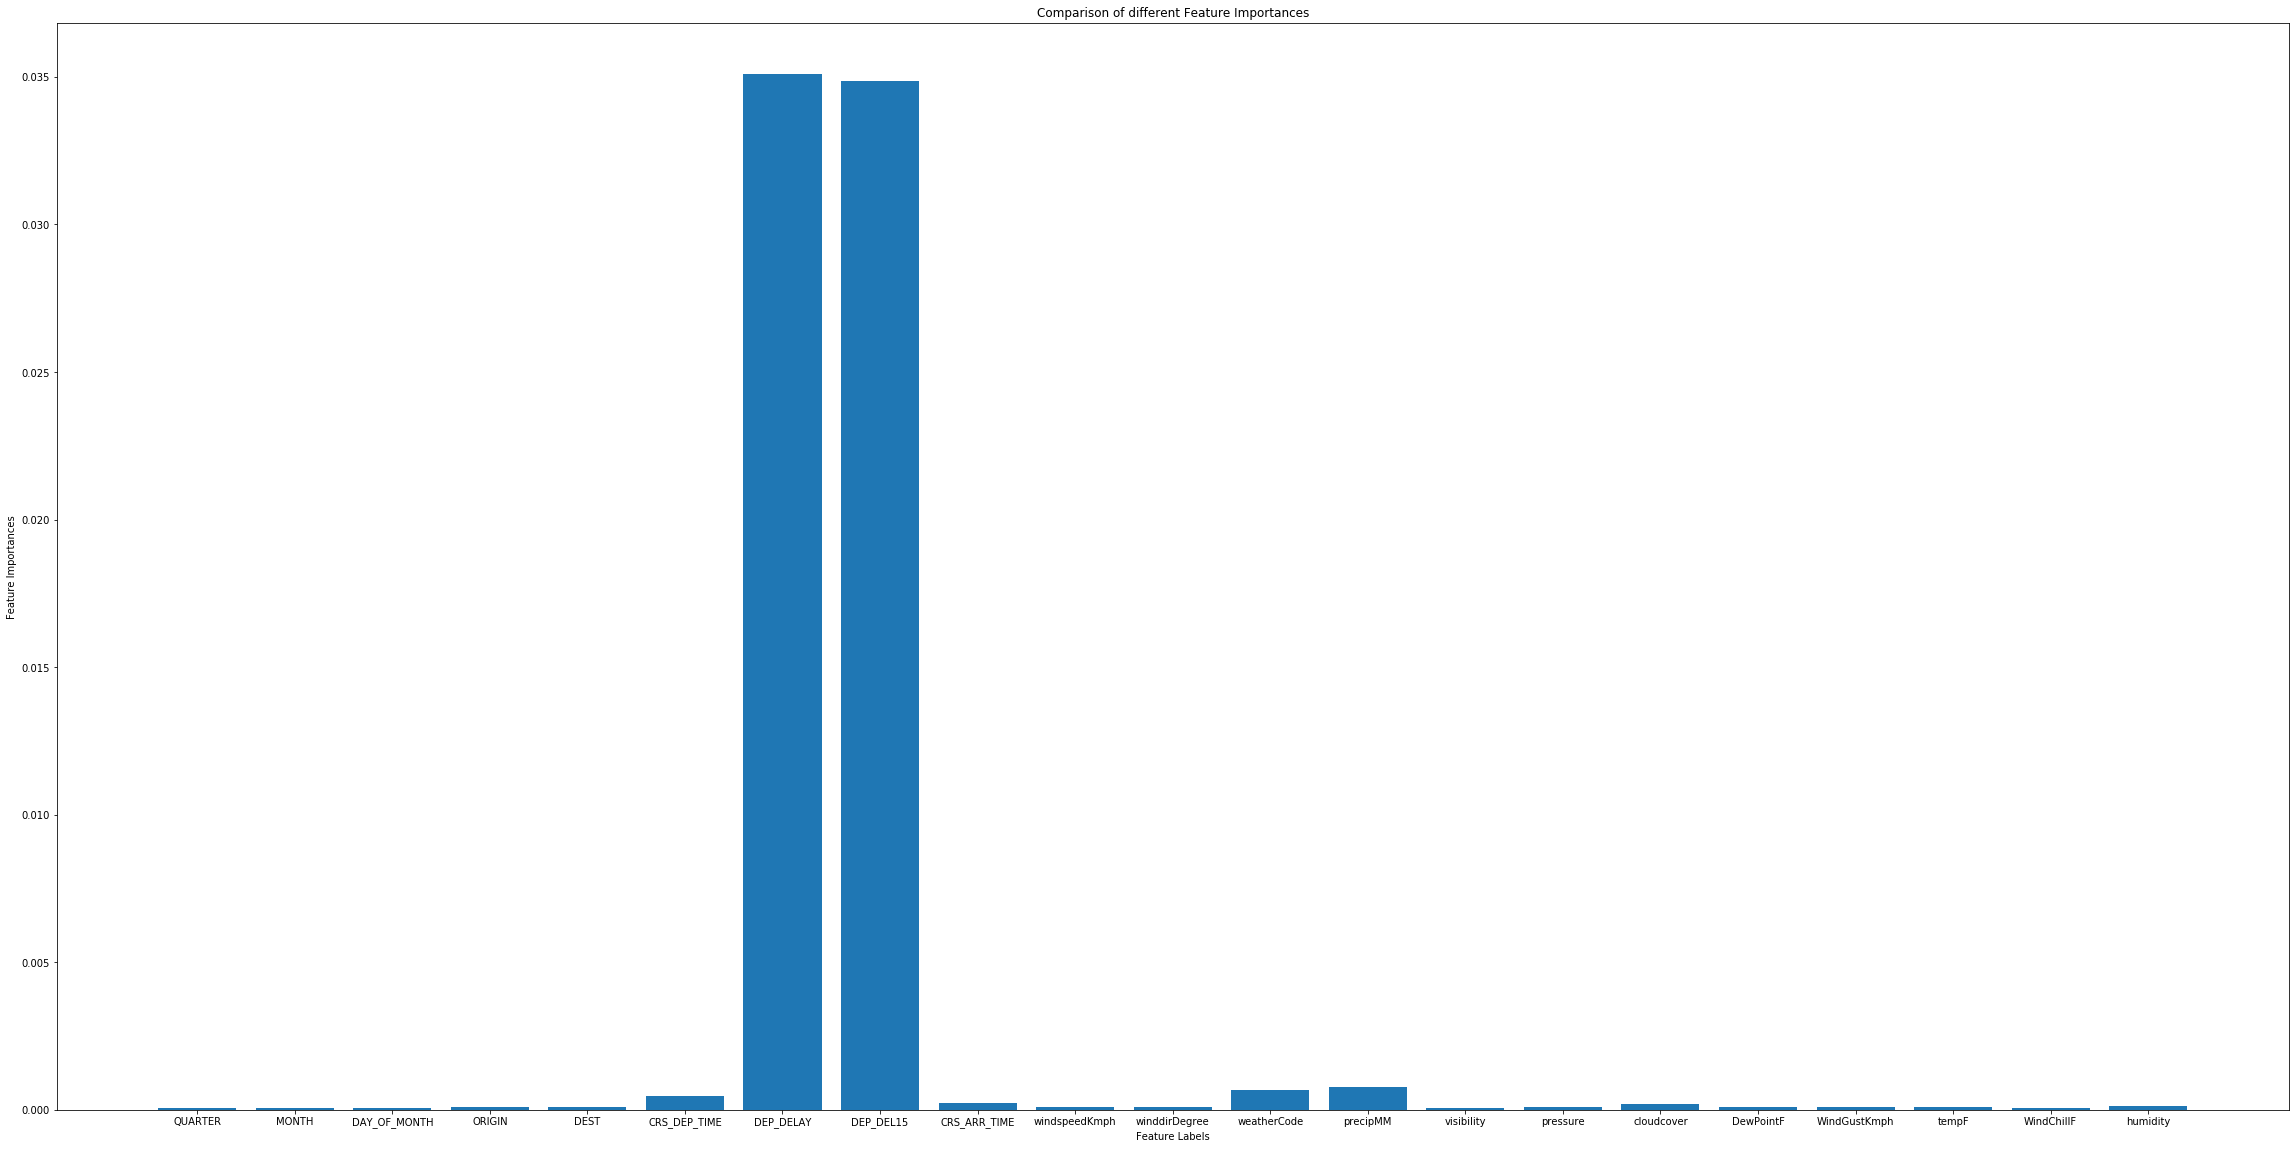

In [12]:
X = df.drop('ARR_DELAY',1)
feature_importance = etr.feature_importances_
feature_importance_normalized = np.std([tree.feature_importances_ for tree in etr.estimators_], axis = 0)
plt.figure(figsize=(40,20))
plt.bar(X.columns, feature_importance_normalized) 
plt.xlabel('Feature Labels') 
plt.ylabel('Feature Importances') 
plt.title('Comparison of different Feature Importances') 
plt.show() 